In [ ]:
# Basic example using classic computing
# 5 is in the position 12 of the list (starting from 0)
list = [1, 2, 3, 4, 1, 4, 3, 2, 1, 2, 3, 4, 5, 4, 3, 2, 1]

# Space complexity: O(n)
# We make the logic go the "Oracle"
def oracle(input):
  winner = 5
  if input == winner:
    response = True
  else:
    response = False
  return response

# We iterate over the list and check if the number is the winner with the help of the oracle
for index, trial_number in enumerate(list):
  if oracle(trial_number) is True:
    print(f"{trial_number} is the winner! It is in the position {index} of the list")
    print('%i calls to the Oracle' % (index + 1))
    break

5 is the winner! It is in the position 12 of the list
13 calls to the Oracle


🟢 Step 1: Initialization (Superposition)


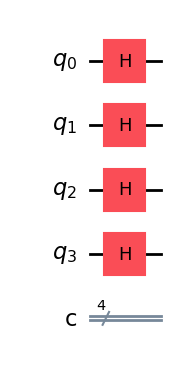

🔵 Step 2: Apply Oracle (Marking the target state |1010⟩)


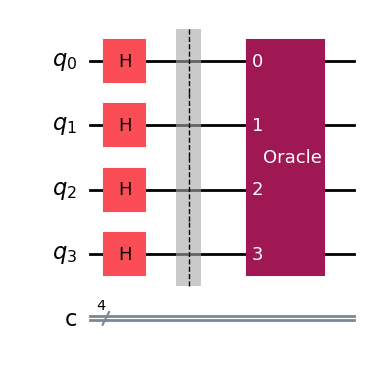

🟠 Step 3: Apply Diffuser (Amplification)


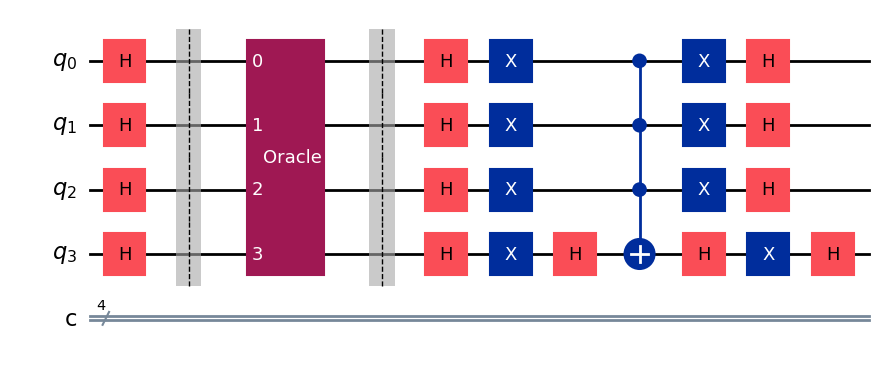

🟣 Step 4: Measurement (Extracting the solution)


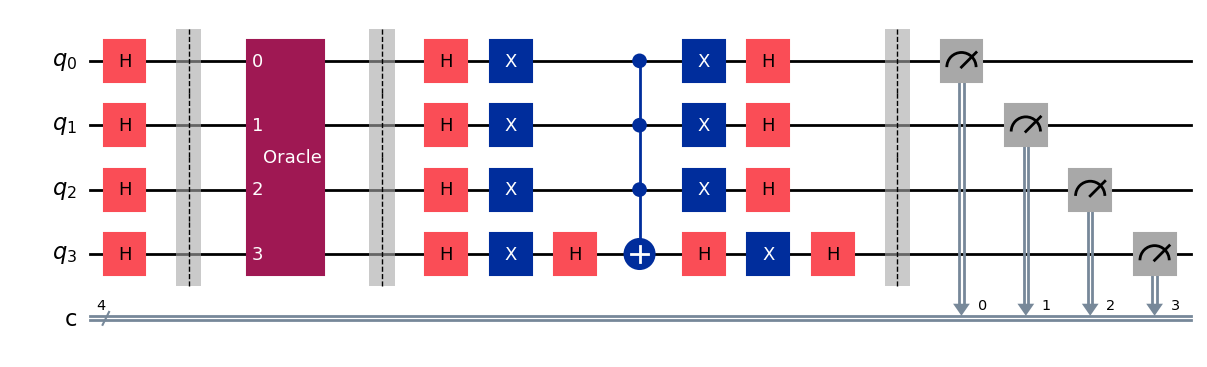

📊 Final Measurement Results:


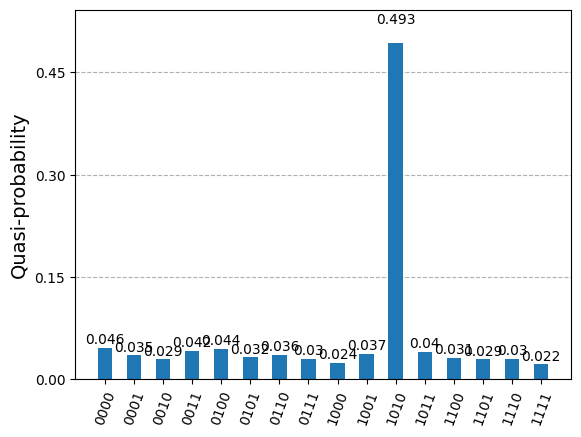

In [ ]:
# Import required Qiskit libraries and utilities
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import UnitaryGate  # Import the custom unitary gate
from IPython.display import display
import numpy as np

# Define the number of data qubits
# With 4 qubits, there are 16 possible states
n = 4

# ─── Step 1: Oracle ──────────────────────────────────────────────────────────
def oracle(n):
    """
    Oracle that marks the target state |1010⟩ by applying a phase flip (-1).
    The state |1010⟩ corresponds to index 10 in the state vector (binary order).
    A diagonal gate of dimension 2^n is created with all 1's except at index 10.
    """
    qc = QuantumCircuit(n)
    # Create a diagonal vector: all 1's, except -1 at position 10
    diag = np.ones(2**n)
    diag[10] = -1
    oracle_gate = UnitaryGate(np.diag(diag), label="Oracle")
    qc.append(oracle_gate, list(range(n)))
    return qc

# ─── Step 2: Diffuser ─────────────────────────────────────────────────────────
def diffuser(n):
    """
    Grover's diffuser for n qubits:
      D = H^n (2|0⟩⟨0| - I) H^n
    It is implemented by applying:
      - Hadamard gates on all qubits,
      - X gates on all qubits,
      - A multi-controlled gate (MCX) where the first n-1 qubits control the nth qubit,
      - Then reversing the transformation.
    """
    qc = QuantumCircuit(n)
    qc.h(range(n))
    qc.x(range(n))
    qc.h(n-1)
    # Use mcx (multi-controlled X) for the multi-controlled gate
    qc.mcx(list(range(n-1)), n-1)
    qc.h(n-1)
    qc.x(range(n))
    qc.h(range(n))
    return qc

# ─── Construct the Grover Circuit ─────────────────────────────────────────────
grover_circuit = QuantumCircuit(n, n)

# Step 3.1: Initialization - Create a superposition on all qubits
grover_circuit.h(range(n))
print("🟢 Step 1: Initialization (Superposition)")
display(grover_circuit.draw("mpl"))

# Step 3.2: Apply the Oracle (marks the target state |1010⟩)
grover_circuit.barrier()
grover_circuit = grover_circuit.compose(oracle(n))
print("🔵 Step 2: Apply Oracle (Marking the target state |1010⟩)")
display(grover_circuit.draw("mpl"))

# Step 3.3: Apply the Diffuser (amplification)
grover_circuit.barrier()
grover_circuit = grover_circuit.compose(diffuser(n))
print("🟠 Step 3: Apply Diffuser (Amplification)")
display(grover_circuit.draw("mpl"))

# Step 3.4: Measurement - Measure all qubits
grover_circuit.barrier()
grover_circuit.measure(range(n), range(n))
print("🟣 Step 4: Measurement (Extracting the solution)")
display(grover_circuit.draw("mpl"))

# ─── Execute the Simulation ─────────────────────────────────────────────
simulator = AerSimulator()
compiled_circuit = transpile(grover_circuit, simulator)
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()
counts = result.get_counts()

print("📊 Final Measurement Results:")
# Assume counts is your measurement result and shots is the total number of shots (e.g., 1000)
# shots = 1000
# norm_counts = {state: count/shots for state, count in counts.items()}
# display(plot_histogram(norm_counts))
display(plot_histogram(counts))